In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def result_calculate(probability, income):
    income *= probability
    income = np.sum(income, axis=1)
    return(income)

def print_decision(result):
    max = np.argmax(result)
    print('Прийняте рішення - альтернатива', max + 1, 'з очікуваним чистим доходом', result[max])

def utility_calculate(p):
    utility = 100 * (1 - p)
    return utility

def income_calculate(production, salesPrice, productionCosts):
    soldNumber = list()
    for i in production:
        for j in range(len(production)):
            soldNumber.append(i if i <= production[j] else production[j])
    soldNumber = np.array(soldNumber).reshape((len(production), len(production)))
    soldNumber *= salesPrice
    production *= productionCosts

    income = np.array([(soldNumber - production).T], dtype='float64')
    income = np.squeeze(income)
    return income

def graph(value, utility, x, y):
    f = np.poly1d(np.polyfit(value, utility, 5)) 
    x_new = np.linspace(min(value), max(value), 1000)
    y_new = f(x_new)
    plt.plot(x_new, y_new, color='blue')
    plt.plot(x, y, color='yellow')
    plt.xlabel('Сума')
    plt.ylabel('Корисність')
    plt.title('Власна функція корисності')
    plt.show()

In [292]:
probability = np.array([0.25, 0.3, 0.45])
income = np.array([[30000, 0, -35000],
                    [10000, 0, -5000]], dtype='float64')
result = result_calculate(probability, income)
print(result)
print_decision(result)

[-8250.   250.]
Прийняте рішення - альтернатива 2 з очікуваним чистим доходом 250.0


In [293]:
df = pd.read_excel('lab3.xlsx', sheet_name='Лист1')
value = df.iloc[14:22,1:2].values.astype('float64')
value = np.squeeze(value)
#print(value)

p = df.iloc[14:22,3:4].values.astype('float64')
p = np.squeeze(p)
#print(p)

utility = utility_calculate(p)

#print(np.floor(utility))

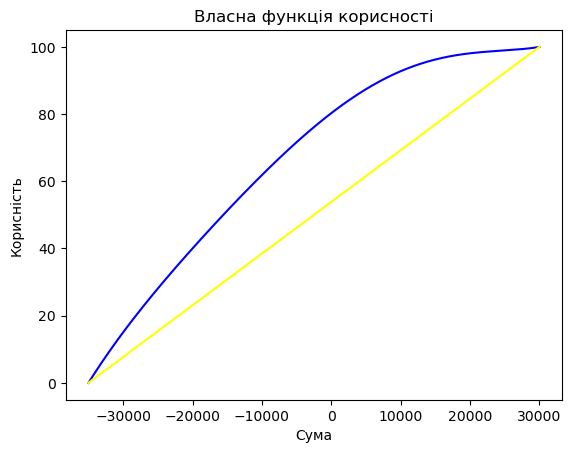

In [294]:
x = np.array([-35000, 30000])
y = np.array([0, 100])
graph(value, utility, x, y)

In [295]:
probability = np.array([0.3, 0.6, 0.1])
production = np.array([10, 15, 20])
salesPrice = 2400
productionCosts = 1500

income = income_calculate(production, salesPrice, productionCosts)
print('Чистий дохід:\n', income)

result = result_calculate(probability, income)

print('\nОчікуваний чистий дохід:', result)

print_decision(result)

Чистий дохід:
 [[ 9000.  9000.  9000.]
 [ 1500. 13500. 13500.]
 [-6000.  6000. 18000.]]

Очікуваний чистий дохід: [9000. 9900. 3600.]
Прийняте рішення - альтернатива 2 з очікуваним чистим доходом 9900.0


In [296]:
df = pd.read_excel('lab3.xlsx', sheet_name='Лист2')
value = df.iloc[23:30,1:2].values.astype('float64')
value = np.squeeze(value)

#print(value)

p = df.iloc[23:30,3:4].values.astype('float64')
p = np.squeeze(p)

#print(p)

utility = utility_calculate(p)

#print(np.floor(utility))

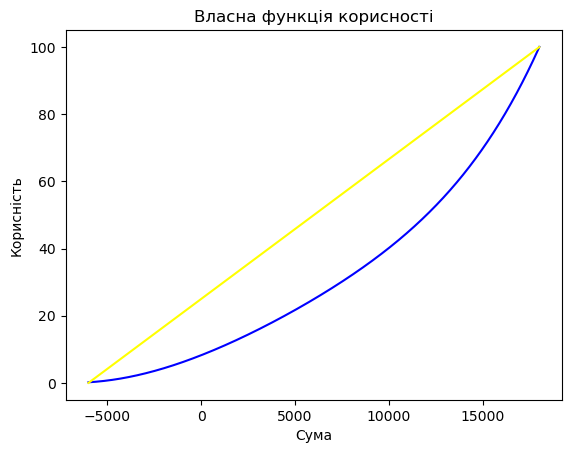

In [297]:
x = np.array([-6000, 18000])
y = np.array([0, 100])
graph(value, utility, x, y)